# Introduction

In [1]:
# Imports Libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_theme(style='darkgrid')

In [2]:
# Load the dataset
data = pd.read_csv("datasets/credit_risk_dataset.csv")
data.head(3)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [4]:
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


# Data Cleaning

In [5]:
#validate missing values
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [6]:
data = data.dropna()
data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [7]:
# Check Duplicated Values
data.duplicated().sum()

137

In [8]:
data = data.drop_duplicates()
data.duplicated().sum()

0

In [9]:
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28501.000000,2.850100e+04,28501.000000,28501.000000,28501.000000,28501.000000,28501.000000,28501.000000
mean,27.738676,6.665441e+04,4.790148,9658.533034,11.045385,0.217115,0.169517,5.800498
std,6.316166,6.237603e+04,4.157462,6329.604672,3.230748,0.412289,0.106410,4.042153
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.950000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.600000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.covariance import EllipticEnvelope

numeric_data = data.select_dtypes(include=['number'])

x = numeric_data.drop(['loan_status'], axis=1)
y = data['loan_status']

model = LinearRegression()
model.fit(x, y)

y_pred = model.predict(x)

# Calculating the mean squared error
mse = mean_squared_error(y, y_pred)

# Detecting outliers using the Elliptic Envelope method
outlier_detector = EllipticEnvelope(contamination=0.1)
outlier_detector.fit(x)

# Identifying outliers
outliers = outlier_detector.predict(x) == -1

# Removing outliers from the dataset
data = data[~outliers]

# Printing the results
print("Mean Squared Error:", mse)
print("Outliers:", sum(outliers))

Mean Squared Error: 0.1261861967807924
Outliers: 2850


In [11]:
data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3
19,24,10800,MORTGAGE,8.0,EDUCATION,B,1750,10.99,1,0.16,N,2
23,24,10980,OWN,0.0,PERSONAL,A,1500,7.29,0,0.14,N,3
...,...,...,...,...,...,...,...,...,...,...,...,...
32287,36,44000,RENT,4.0,DEBTCONSOLIDATION,D,8000,17.49,1,0.18,N,15
32290,37,90000,MORTGAGE,11.0,DEBTCONSOLIDATION,A,4000,6.62,0,0.04,N,15
32293,38,110000,MORTGAGE,5.0,MEDICAL,B,16000,11.99,0,0.15,N,13
32294,36,92000,MORTGAGE,18.0,DEBTCONSOLIDATION,A,4000,7.29,0,0.04,N,13


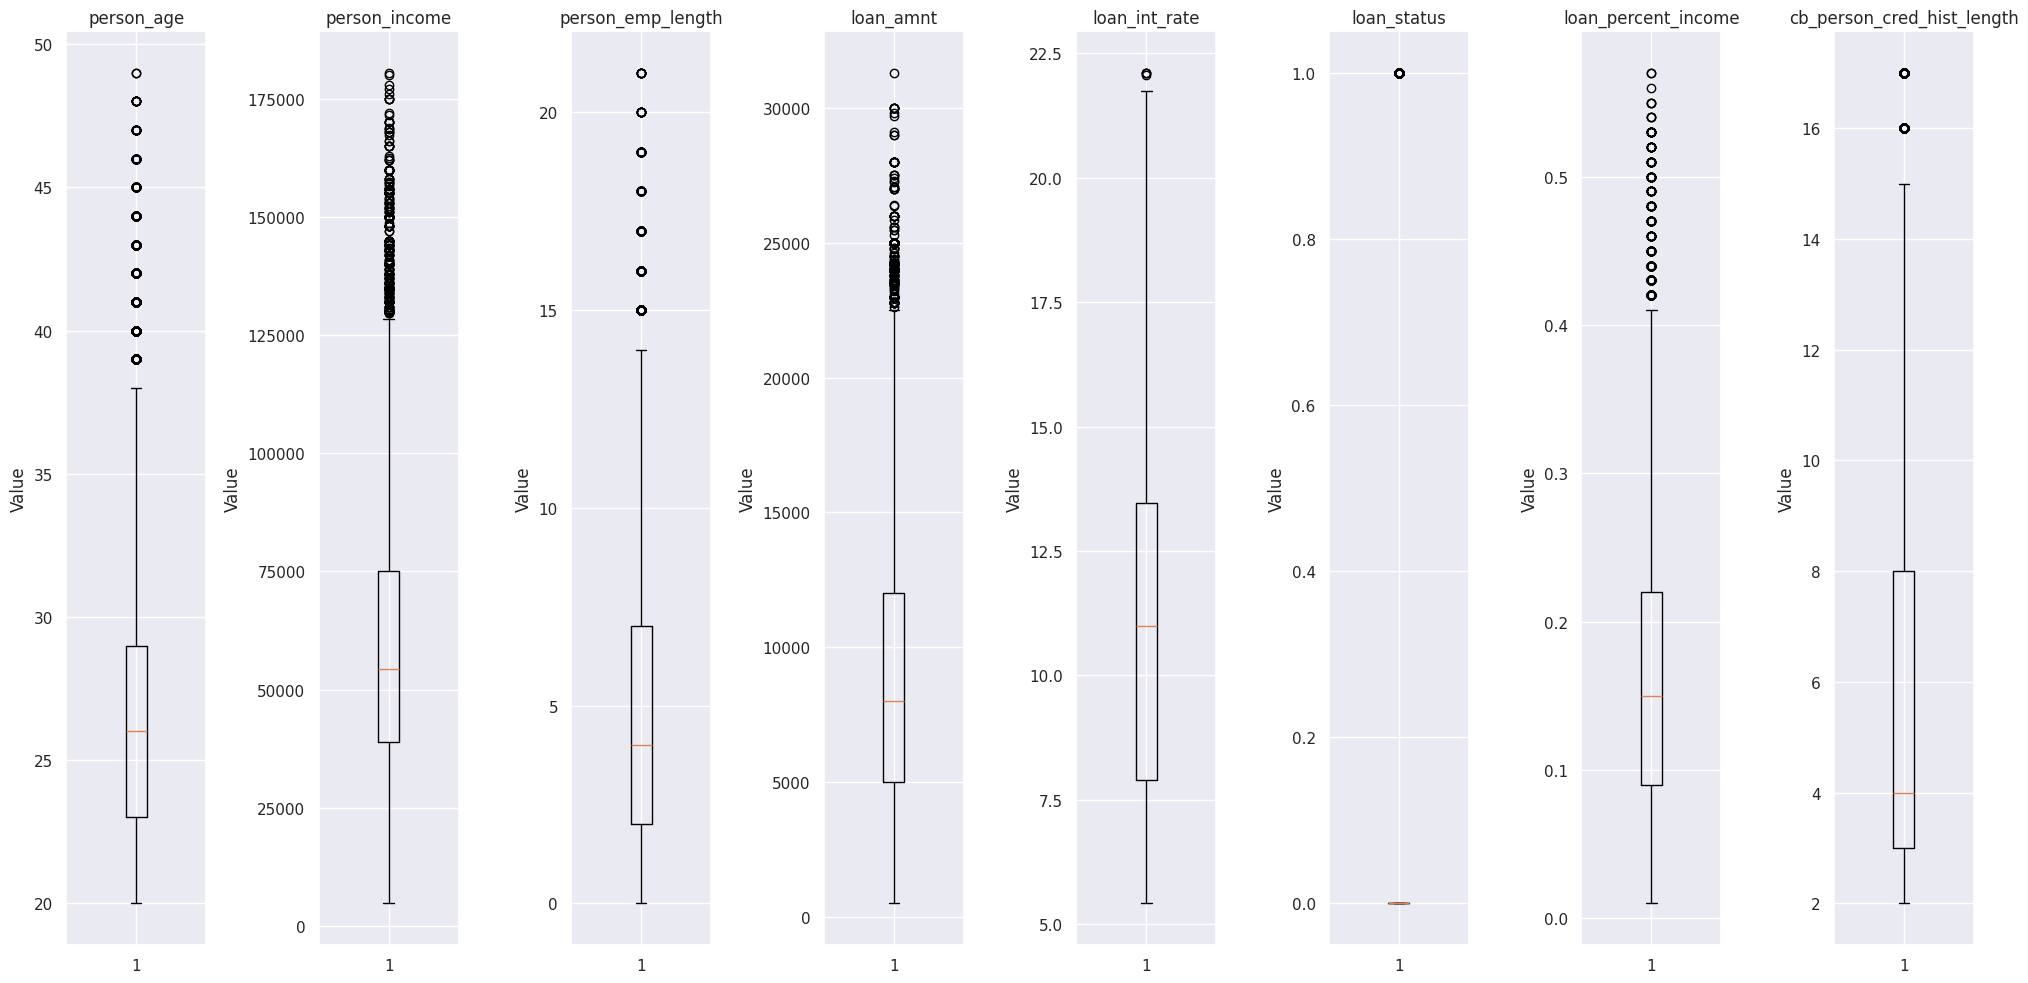

In [12]:
# Create a box plot to visualize outliers
numeric_data = data.select_dtypes(include=['number'])

# Create a figure to hold all the box plots
plt.figure(figsize=(20, 10))

# Loop through each column in the numeric data and create a box plot
for i, column in enumerate(numeric_data.columns):
    plt.subplot(1, len(numeric_data.columns), i + 1)
    plt.boxplot(numeric_data[column])
    plt.title(column)
    plt.ylabel('Value')

# Adjust layout
plt.tight_layout()

# Show the box plots
plt.show()

In [13]:
loan_status_values = data["loan_status"].unique()
loan_status_values

array([0, 1])

In [14]:
print('Non Default', round(data['loan_status'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Default', round(data['loan_status'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

Non Default 79.31 % of the dataset
Default 20.69 % of the dataset


/tmp/ipykernel_5695/569180987.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="loan_status", data=data, palette="Set2", order=loan_status_values)


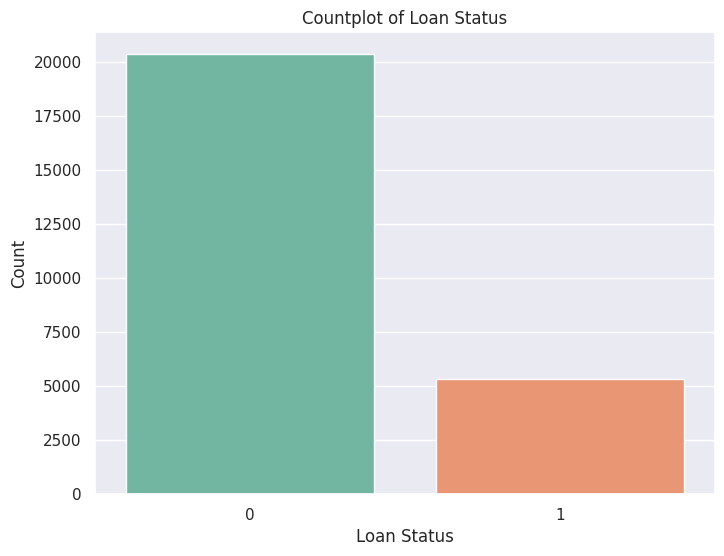

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(x="loan_status", data=data, palette="Set2", order=loan_status_values)
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.title("Countplot of Loan Status")
plt.show()

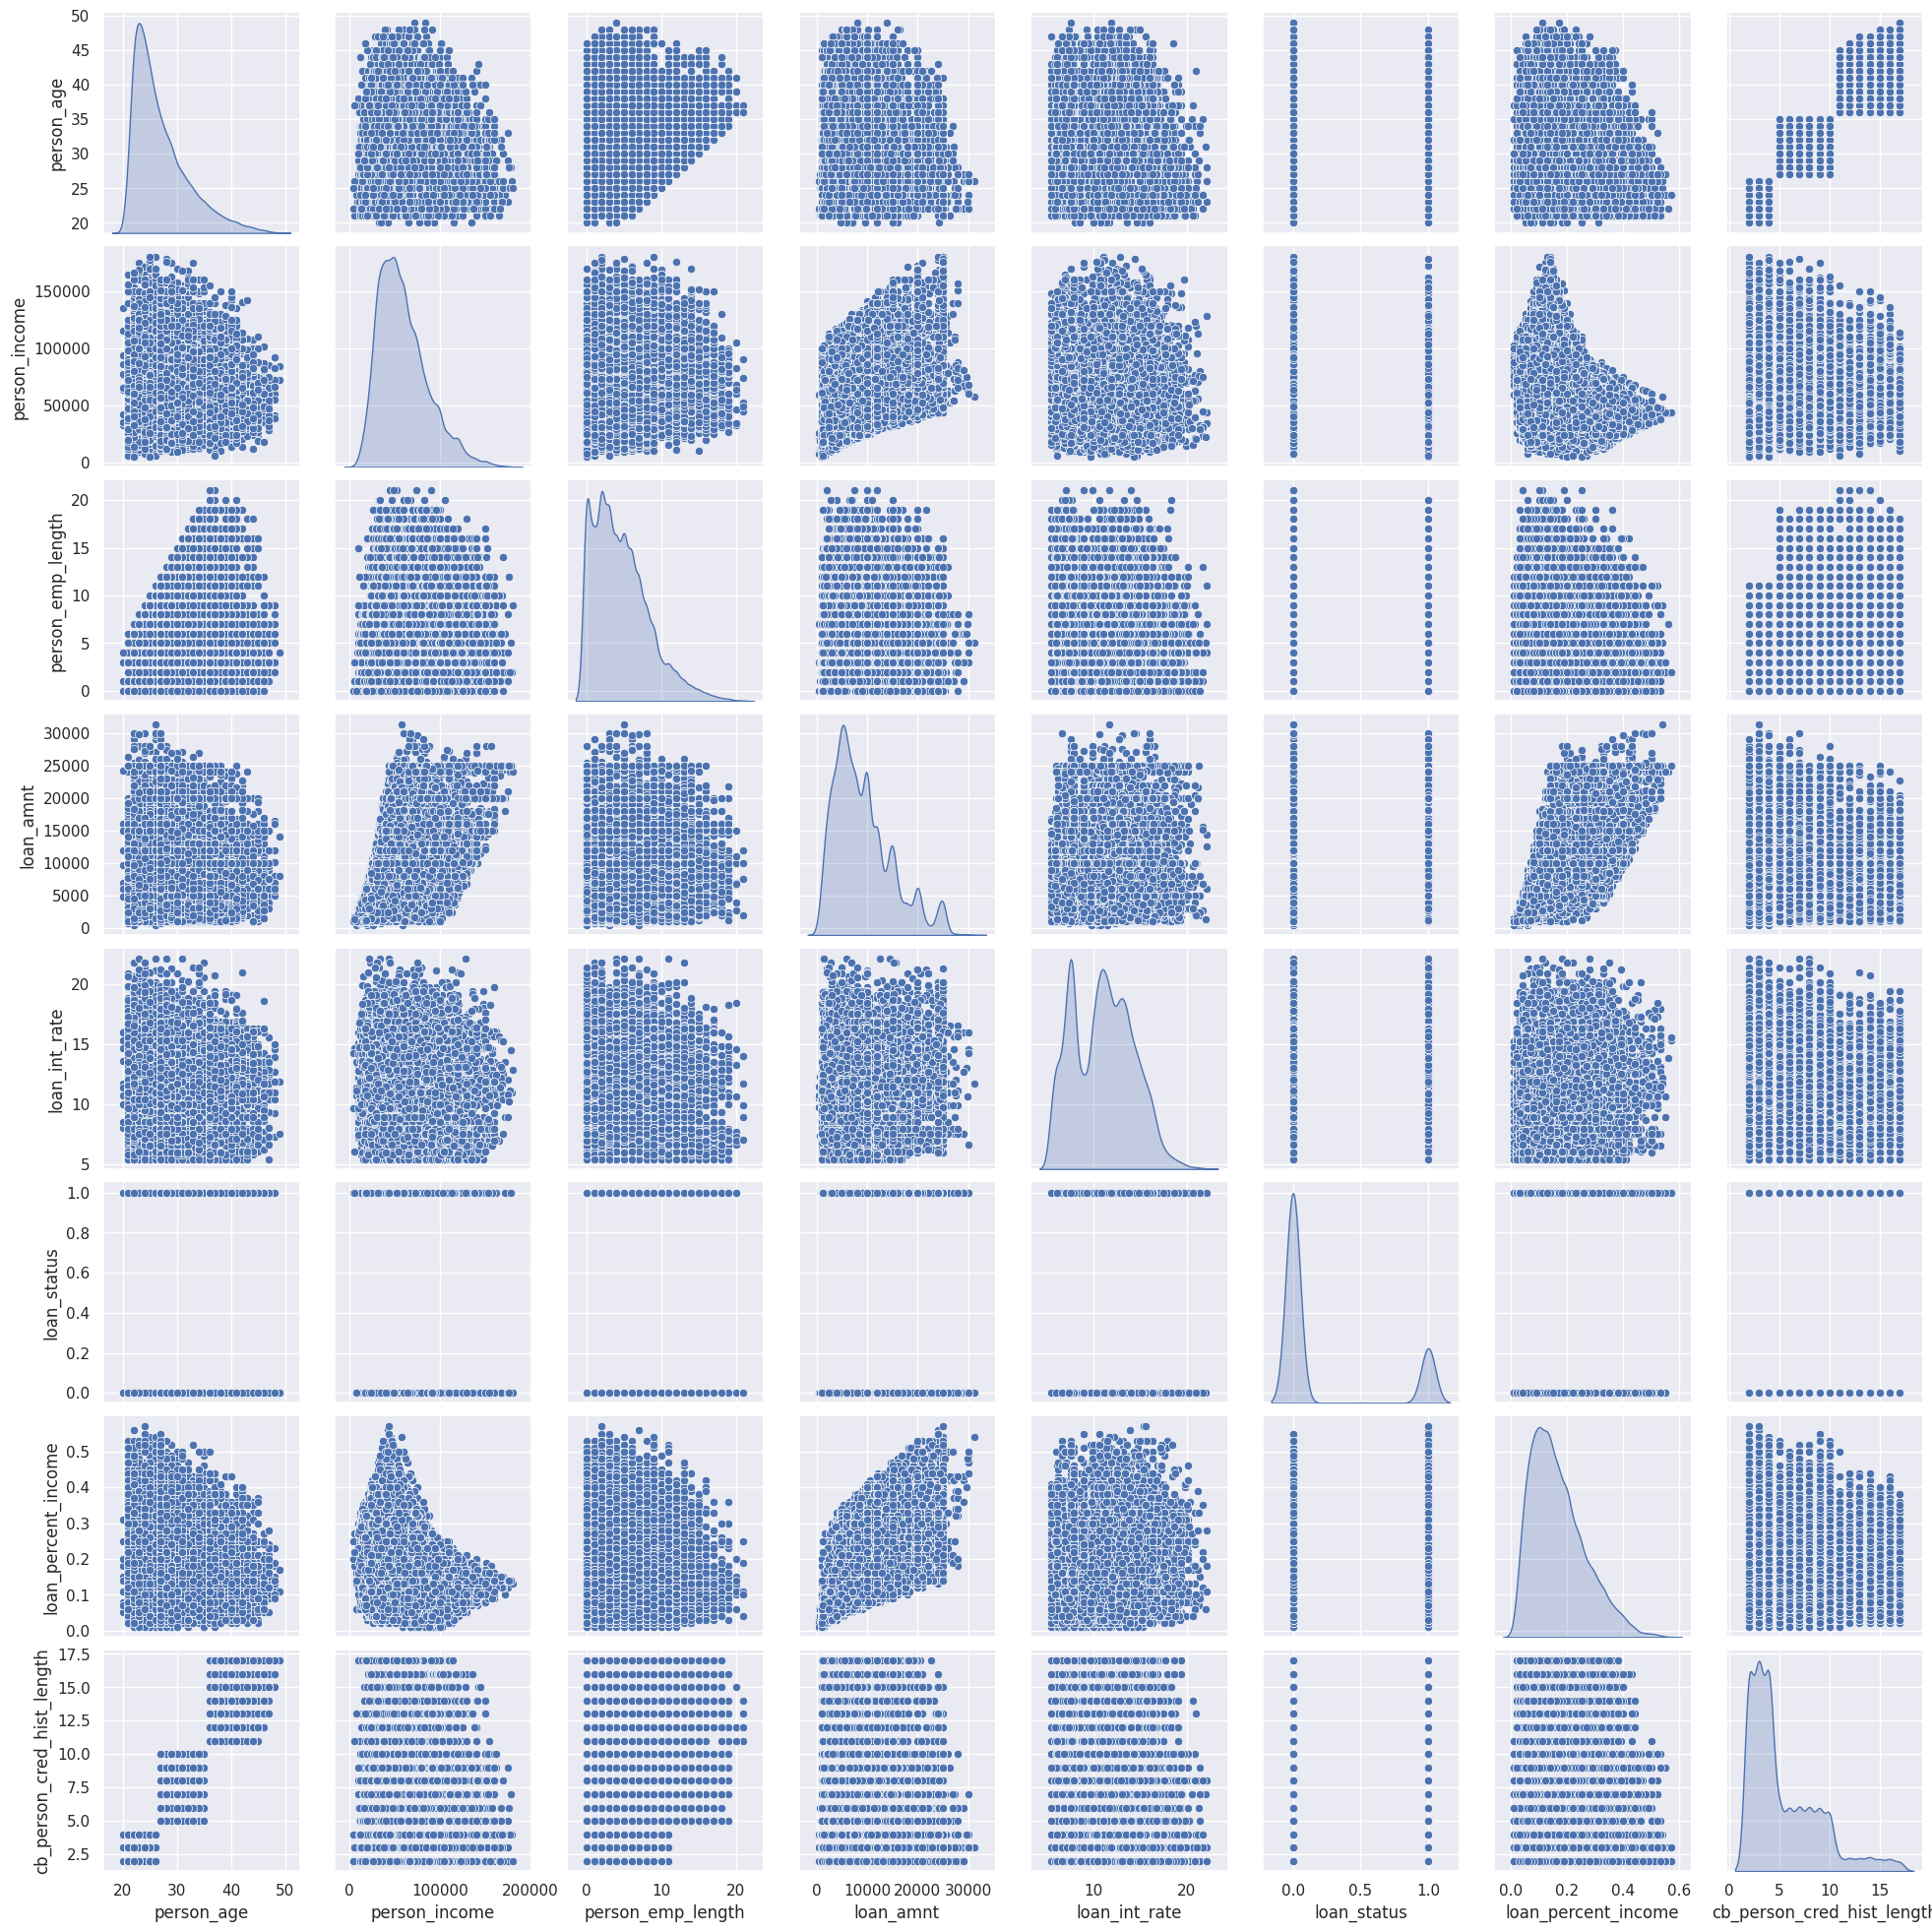

In [16]:
sns.pairplot(data, diag_kind='kde')
plt.show()

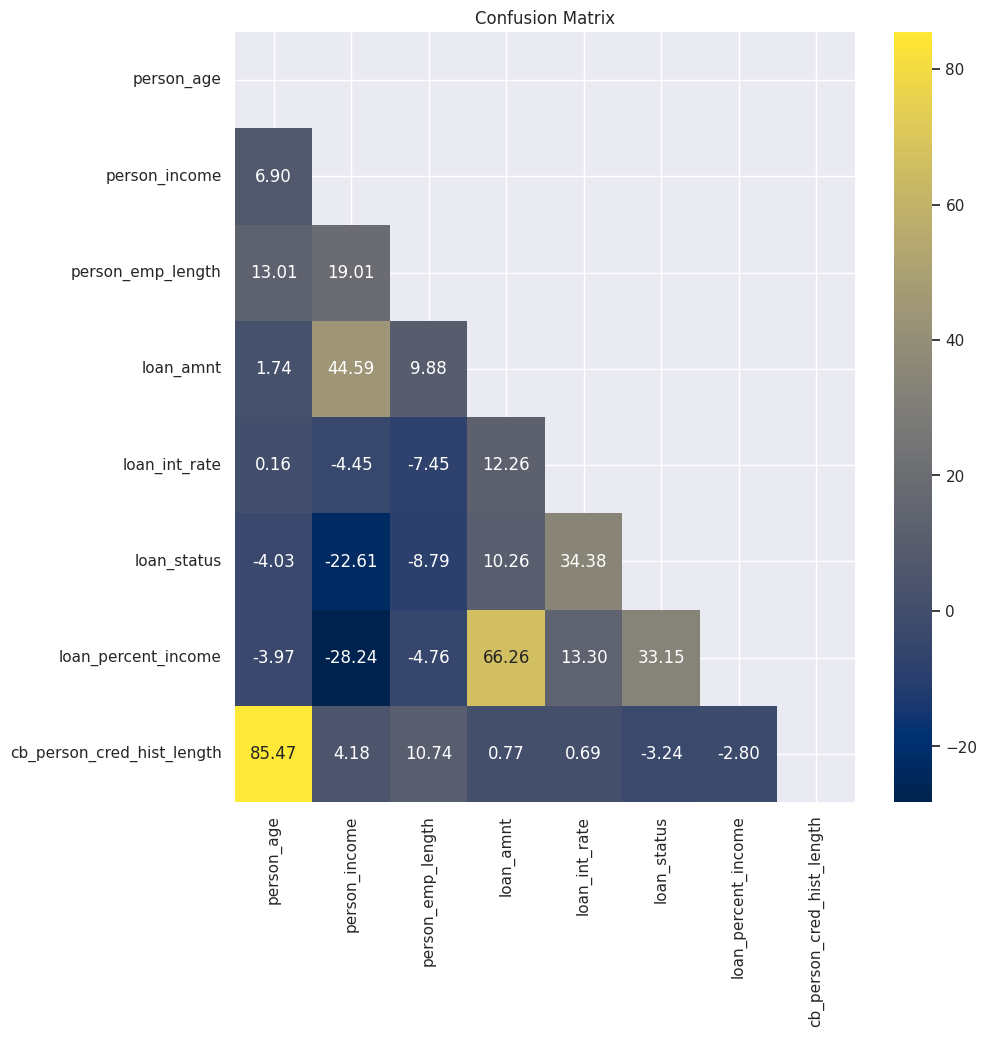

In [17]:
# correlation plot
plt.figure(figsize=(10, 10)) 
data_num = data.select_dtypes(include=['number'])
corr = data_num.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr * 100, cmap = 'cividis', annot= True, fmt='.2f', mask=mask)
plt.title('Confusion Matrix')
plt.show()

# Feature Engineering

In [18]:
#declare features vector and target
x = data.drop(['loan_status'], axis=1)
y = data['loan_status']

In [19]:
#define category features
data_cat = x.select_dtypes(include=['object'])

# Calculate and display the number of unique values for each 'object' column
for column in data_cat.columns:
    unique_count = data_cat[column].nunique()
    print(f"Column '{column}' has {unique_count} unique values.")

Column 'person_home_ownership' has 4 unique values.
Column 'loan_intent' has 6 unique values.
Column 'loan_grade' has 7 unique values.
Column 'cb_person_default_on_file' has 2 unique values.


In [20]:
# Encoding Categorical Variables
x_encoded = pd.get_dummies(x, columns=data_cat.columns)
x_encoded

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
1,21,9600,5.0,1000,11.14,0.10,2,False,False,True,...,False,False,True,False,False,False,False,False,True,False
5,21,9900,2.0,2500,7.14,0.25,2,False,False,True,...,True,True,False,False,False,False,False,False,True,False
9,21,10000,6.0,1600,14.74,0.16,3,False,False,True,...,True,False,False,False,True,False,False,False,True,False
19,24,10800,8.0,1750,10.99,0.16,2,True,False,False,...,False,False,True,False,False,False,False,False,True,False
23,24,10980,0.0,1500,7.29,0.14,3,False,False,True,...,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32287,36,44000,4.0,8000,17.49,0.18,15,False,False,False,...,False,False,False,False,True,False,False,False,True,False
32290,37,90000,11.0,4000,6.62,0.04,15,True,False,False,...,False,True,False,False,False,False,False,False,True,False
32293,38,110000,5.0,16000,11.99,0.15,13,True,False,False,...,False,False,True,False,False,False,False,False,True,False
32294,36,92000,18.0,4000,7.29,0.04,13,True,False,False,...,False,True,False,False,False,False,False,False,True,False


In [21]:
# Apply SMOTE to the training data
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_encoded, y)

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_resampled)
x_scaled = scaler.transform(x_resampled)

In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_resampled, test_size=0.2, random_state=42)

# Model Selection

In [24]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import recall_score, precision_score, accuracy_score, fbeta_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Define individual classifiers
clf1 = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs', random_state=42)
clf2 = RandomForestClassifier(n_estimators=100, random_state=42, max_depth = 9)
clf3 = SVC(kernel='poly', C=1.0, decision_function_shape='ovr', random_state=42, probability=True)
clf4 = KNeighborsClassifier(n_neighbors = 2)

# Fit and evaluate each individual classifier
classifiers = [clf1, clf2, clf3, clf4]
clf_proba = []
clf_name = []

for clf in classifiers:
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    y_pred_proba = clf.predict_proba(x_test)[:,1]
    clf_proba.append(y_pred_proba)
    clf_name.append(clf.__class__.__name__)
    
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f0_5 = fbeta_score(y_test, y_pred, beta=0.5)
    f1 = fbeta_score(y_test, y_pred, beta=1)
    f2 = fbeta_score(y_test, y_pred, beta=2)
    accuracy = accuracy_score(y_test, y_pred)      
        
    print(f"{clf.__class__.__name__}")
    print(f'Recall:  {recall * 100:.2f}%')
    print(f'Precision:  {precision * 100:.2f}%')
    print(f'F0.5 Score:  {f0_5 * 100:.2f}%')
    print(f'F1 Score:  {f1 * 100:.2f}%')
    print(f'F2 Score:  {f2 * 100:.2f}%')
    print(f'Accuracy:  {accuracy * 100:.2f}%')
    print('-----' * 15)

# Create a Voting Classifier that combines the predictions of the individual classifiers
voting_clf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('svm', clf3), ('knn', clf4)], voting='soft')

# Fit the ensemble model on the training data
voting_clf.fit(x_train, y_train)

# Make predictions using the ensemble model
voting_y_pred = voting_clf.predict(x_test)
voting_y_pred_proba = voting_clf.predict_proba(x_test)[:,1]
clf_proba.append(voting_y_pred_proba)
clf_name.append(voting_clf.__class__.__name__)

# Evaluate the ensemble model's accuracy
voting_recall = recall_score(y_test, voting_y_pred)
voting_precision = precision_score(y_test, voting_y_pred)
voting_f0_5 = fbeta_score(y_test, y_pred, beta=0.5)
voting_f1 = fbeta_score(y_test, y_pred, beta=1)
voting_f2 = fbeta_score(y_test, y_pred, beta=2)
voting_accuracy = accuracy_score(y_test, voting_y_pred)

print(f"{voting_clf.__class__.__name__}")
print(f'Recall:  {voting_recall * 100:.2f}%')
print(f'Precision:  {voting_precision * 100:.2f}%')
print(f'F0.5 Score:  {voting_f0_5 * 100:.2f}%')
print(f'F1 Score:  {voting_f1 * 100:.2f}%')
print(f'F2 Score:  {voting_f2 * 100:.2f}%')
print(f'Accuracy:  {voting_accuracy * 100:.2f}%')

/home/ah/Desktop/Credit-Risk/env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression
Recall:  88.07%
Precision:  93.84%
F0.5 Score:  92.63%
F1 Score:  90.87%
F2 Score:  89.17%
Accuracy:  91.19%
---------------------------------------------------------------------------
RandomForestClassifier
Recall:  89.88%
Precision:  96.30%
F0.5 Score:  94.94%
F1 Score:  92.98%
F2 Score:  91.09%
Accuracy:  93.24%
---------------------------------------------------------------------------
SVC
Recall:  90.02%
Precision:  98.09%
F0.5 Score:  96.36%
F1 Score:  93.88%
F2 Score:  91.53%
Accuracy:  94.16%
---------------------------------------------------------------------------
KNeighborsClassifier
Recall:  87.56%
Precision:  98.06%
F0.5 Score:  95.77%
F1 Score:  92.51%
F2 Score:  89.47%
Accuracy:  92.95%
---------------------------------------------------------------------------


/home/ah/Desktop/Credit-Risk/env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


VotingClassifier
Recall:  91.63%
Precision:  97.35%
F0.5 Score:  95.77%
F1 Score:  92.51%
F2 Score:  89.47%
Accuracy:  94.59%


#Precision is a valuable metric when the cost of false positives is high
#Recall is especially important in situations where the cost of false negatives is high
#F1 score (beta=1): This is the harmonic mean of precision and recall. It gives equal weight to precision and recall and is the most commonly used F measure.
#F0.5 score (beta=0.5): This weighs precision higher than recall. It's useful when reducing the number of false positives is more important than finding all positive instances.
#F2 score (beta=2): This weighs recall higher than precision. It's useful when finding all positive instances is more important than being precise.

# Evaluate Model

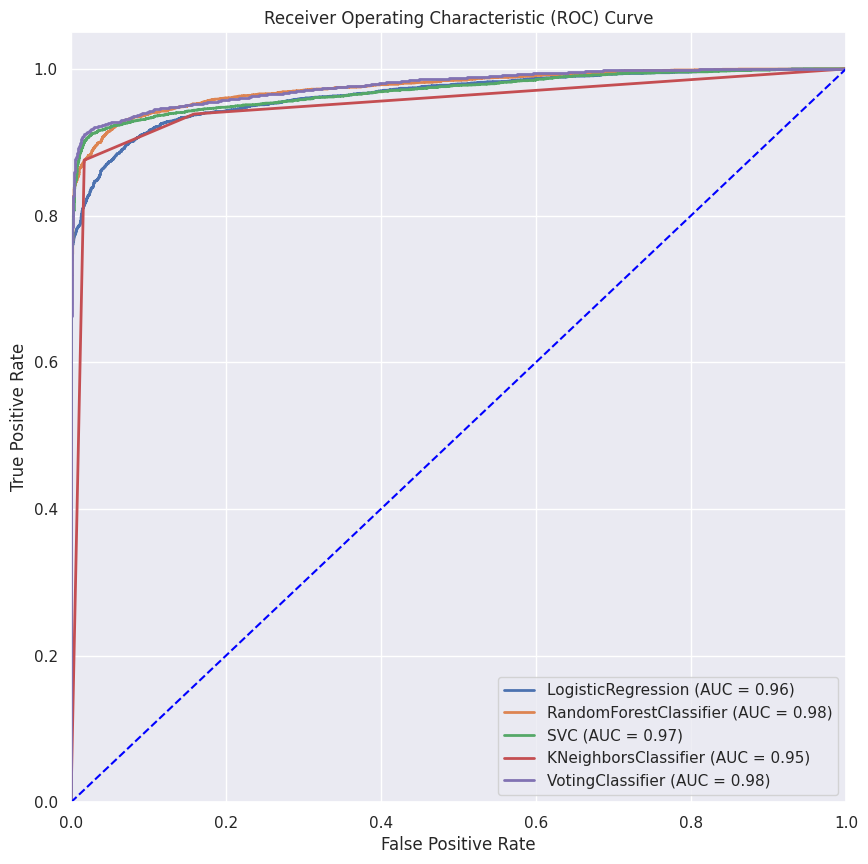

In [25]:
#ROC
from sklearn.metrics import roc_curve, auc

# Initialize empty lists or arrays to store ROC curve data
fpr_test = []
tpr_test = []
roc_auc_test = []

for i in range(len(clf_proba)):
    # Compute ROC curve and AUC for testing set    
    fpr, tpr, _ = roc_curve(y_test, clf_proba[i])

    # Calculate AUC (Area Under the Curve)
    roc_auc = auc(fpr, tpr)

    # Append the results to the lists or arrays
    fpr_test.append(fpr)
    tpr_test.append(tpr)
    roc_auc_test.append(roc_auc)

# Plot ROC curves for each model
plt.figure(figsize=(10, 10))

for i in range(len(clf_proba)):
    #plt.plot(fpr_test[i], tpr_test[i], lw=2, label= (i, clf_name[i]) % ' (AUC = %0.2f)' % (i, roc_auc_test[i]))
    plt.plot(fpr_test[i], tpr_test[i], lw=2, label= f'{clf_name[i]} (AUC = {roc_auc_test[i]:.2f})')

plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
    
plt.show()

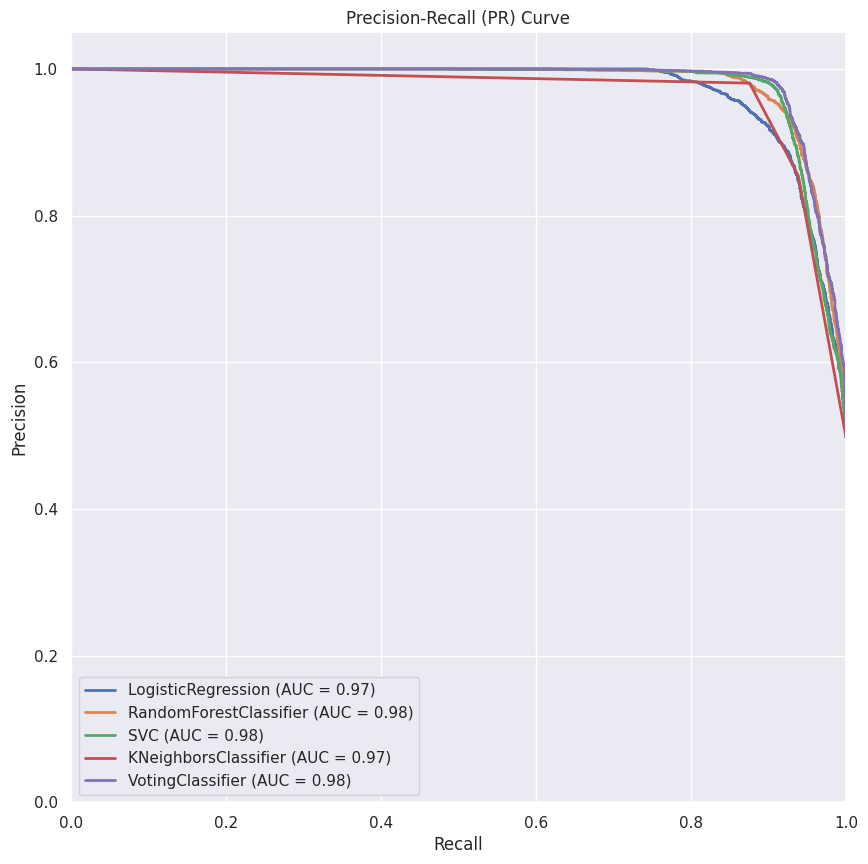

In [26]:
#FR
from sklearn.metrics import precision_recall_curve, auc

# Initialize empty lists or arrays to store PR curve data
precision_test = []
recall_test = []
pr_auc_test = []

for i in range(len(clf_proba)):
    # Compute ROC curve and AUC for testing set    
    precision, recall, _ = precision_recall_curve(y_test, clf_proba[i])

    # Calculate AUC (Area Under the Curve)
    pr_auc = auc(recall, precision)

    # Append the results to the lists or arrays
    precision_test.append(precision)
    recall_test.append(recall)
    pr_auc_test.append(pr_auc)

# Plot PR curves for each model
plt.figure(figsize=(10, 10))

for i in range(len(clf_proba)):
    plt.plot(recall_test[i], precision_test[i], lw=2, label=f'{clf_name[i]} (AUC = {pr_auc_test[i]:.2f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall (PR) Curve')
plt.legend(loc='lower left')
plt.show()

Text(0.5, 1.0, 'VotingClassifier Confusion Matrix')

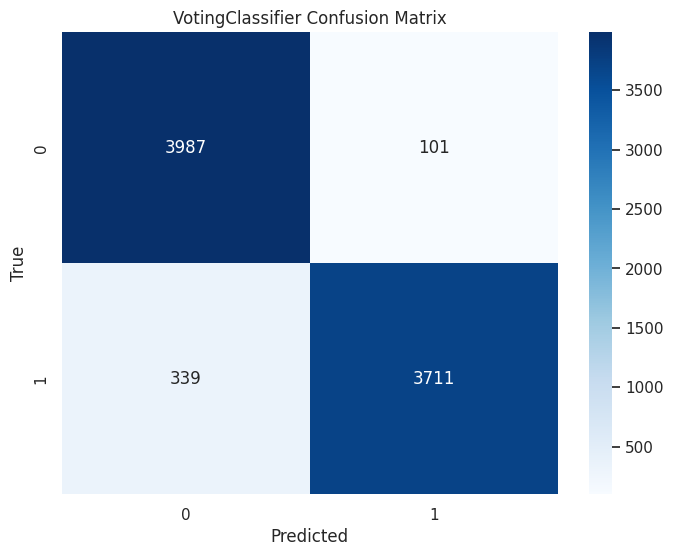

In [27]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(y_test, voting_y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'{voting_clf.__class__.__name__} Confusion Matrix')

In [28]:
from sklearn.metrics import classification_report
print(f'{voting_clf.__class__.__name__} classification report:')
print(classification_report(y_test, voting_y_pred))

VotingClassifier classification report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      4088
           1       0.97      0.92      0.94      4050

    accuracy                           0.95      8138
   macro avg       0.95      0.95      0.95      8138
weighted avg       0.95      0.95      0.95      8138



In [29]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Define individual classifiers
clf1 = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs', random_state=42)
clf2 = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=9)
clf3 = SVC(kernel='poly', C=1.0, decision_function_shape='ovr', random_state=42, probability=True)
clf4 = KNeighborsClassifier(n_neighbors=2)

# Create a Voting Classifier that combines the predictions of the individual classifiers
voting_clf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('svm', clf3), ('knn', clf4)], voting='soft')

# Fit the ensemble model on the training data
voting_clf.fit(x_train, y_train)

# Make predictions using the ensemble model
voting_y_pred = voting_clf.predict(x_test)  # Class labels
voting_y_pred_proba = voting_clf.predict_proba(x_test)[:, 1]  # Probabilities for the positive class

# Output predictions and probabilities
print("Predictions:", voting_y_pred)
print("Predicted Probabilities:", voting_y_pred_proba)

/home/ah/Desktop/Credit-Risk/env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


Predictions: [0 1 1 ... 0 0 1]
Predicted Probabilities: [0.02956638 0.99276605 0.99451357 ... 0.0325024  0.13780009 0.99221901]


In [30]:
# Select a single input from x_test
single_input = x_test[0].reshape(1, -1)  # Replace 0 with the index of the desired sample if needed

# Make predictions using the ensemble model
single_prediction = voting_clf.predict(single_input)  # Class label
single_prediction_proba = voting_clf.predict_proba(single_input)[:, 1]  # Probability for the positive class

# Output the prediction and probability
print("Single Input Prediction:", single_prediction[0])
print("Probability of Positive Class:", single_prediction_proba[0])

Single Input Prediction: 0
Probability of Positive Class: 0.029566376433973363
